# Exploratory Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

"""
@author: Jessica

Exploration done on data after running files ("Preprocessing", "TestSetCreation", 
"FeatureEngineering2") Includes all subjects who have more than a threshold of 
keystrokes and have either mild or no impact to daily life. 
"""

all_users = pd.read_csv("preprocessed_data/selected_user_features.csv")
all_users['genderbin'] = all_users['Gender'].apply({'Male':1, 'Female':0}.get)
data = all_users.loc[all_users["In_Test"] == 0]
all_users.shape
all_users.groupby(by = ["Parkinsons"], as_index= False)["User_ID"].count()

,Parkinsons,User_ID
0,False,32
1,True,40


We have 72 patients with a threshold of at least 2000 keystrokes who have either mild or no impact on daily life. In the training and holdout sets we have a total of 57 patients. This means that we have 15 patients in the final test set.

In [9]:
print(data.shape)
data.groupby(by = ["Parkinsons"], as_index= False)["User_ID"].count()

(57, 49)


,Parkinsons,User_ID
0,False,25
1,True,32


In [10]:
data.head()

,BirthYear,DA,DiagnosisYear,Gender,Impact,Levadopa,MAOB,Other,Parkinsons,Sided,...,RL_med,RL_std,RL_skew,RL_kurt,LR_avg,LR_med,LR_std,LR_skew,LR_kurt,genderbin
0,1949,False,2002,Female,Mild,False,False,True,True,Left,...,218.8,101.733407,0.554294,-0.346595,201.853942,167.0,106.830913,0.916195,-0.042462,0
1,1943,False,-1,Female,-1,False,False,False,False,None,...,531.3,131.744657,-0.122070,-0.350114,494.876471,468.8,138.402068,0.264621,-0.291079,0
2,1947,False,2015,Female,Mild,False,False,True,True,Right,...,171.9,102.872797,2.390486,7.720589,259.178655,203.1,158.669496,1.364127,1.345999,0
3,1943,False,2013,Female,Mild,True,False,False,True,None,...,168.0,104.673816,2.206321,6.517549,180.733637,144.5,112.251855,2.610484,8.198711,0
4,1941,False,2000,Female,Mild,True,False,True,True,Left,...,375.0,152.810057,0.521461,-0.296779,416.020304,390.6,144.206500,0.550034,-0.130020,0


## Summary
The following table shows a summary of each column. Some columns are misleading due to missing values stored as "-1".

In [5]:
data.describe() #hard to attach significant meaning to some as we have many "-1" values

,BirthYear,DiagnosisYear,count,In_Train,In_Test,In_Hold,start_year,age,HT_mu,HT_std,...,RL_med,RL_std,RL_skew,RL_kurt,LR_avg,LR_med,LR_std,LR_skew,LR_kurt,genderbin
count,57.000000,57.000000,57.000000,57.000000,57.0,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,1641.315789,1058.280702,68826.157895,0.877193,0.0,0.122807,16.315789,56.315789,117.846206,105.267126,...,290.429825,116.169232,0.871356,1.785958,298.040389,275.844737,125.211457,0.904445,1.360825,0.385965
std,717.526683,1013.865354,110836.678802,0.331133,0.0,0.331133,0.468961,26.759616,30.019088,312.424038,...,137.244104,30.698302,1.009370,3.472878,108.043241,119.639446,34.087906,0.897485,3.104545,0.491150
min,-1.000000,-1.000000,2207.000000,0.000000,0.0,0.000000,16.000000,-1.000000,55.601009,14.218345,...,117.200000,57.624762,-1.125304,-1.188193,132.957735,109.400000,81.450453,-0.943723,-1.253873,0.000000
25%,1941.000000,-1.000000,6864.000000,1.000000,0.0,0.000000,16.000000,58.000000,99.174320,26.971423,...,187.500000,93.414537,0.130167,-0.561229,227.615890,195.300000,91.606769,0.282172,-0.503352,0.000000
50%,1947.000000,1998.000000,30088.000000,1.000000,0.0,0.000000,16.000000,66.000000,112.762448,42.900653,...,257.800000,108.998929,0.609710,0.141062,259.178655,233.900000,128.149424,0.745230,0.196315,0.000000
75%,1952.000000,2015.000000,79898.000000,1.000000,0.0,0.000000,17.000000,72.000000,136.438176,56.761758,...,374.000000,132.904111,1.508929,2.311249,369.116388,339.800000,148.371084,1.455661,1.859870,1.000000
max,1986.000000,2017.000000,658810.000000,1.000000,0.0,1.000000,17.000000,89.000000,181.579723,1892.691606,...,707.000000,217.474595,2.897273,11.621468,575.198243,625.000000,217.011117,3.127226,14.464687,1.000000


In [6]:
columns = ['BirthYear','DiagnosisYear','count','age', 'HT_mu','HT_std', 'LT_mu', 'LT_std', 'FT_mu', 'FT_std']

col = columns.pop(0)
non_missing = pd.DataFrame(data[col].loc[data[col] != -1].describe())
for col in columns:
    desc = data[col].loc[data[col] != -1].describe()
    non_missing = non_missing.join(desc)
    
non_missing

,BirthYear,DiagnosisYear,count,age,HT_mu,HT_std,LT_mu,LT_std,FT_mu,FT_std
count,48.000000,30.000000,57.000000,48.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,1949.250000,2011.633333,68826.157895,67.062500,117.846206,105.267126,303.553367,125.721355,216.353282,124.831935
std,10.269766,6.451321,110836.678802,10.304732,30.019088,312.424038,96.115839,32.060389,75.865026,29.845928
min,1928.000000,1991.000000,2207.000000,30.000000,55.601009,14.218345,153.335168,77.548124,111.340697,77.070062
25%,1943.000000,2009.250000,6864.000000,64.000000,99.174320,26.971423,232.679044,96.895043,161.420378,98.155501
50%,1947.500000,2014.500000,30088.000000,68.500000,112.762448,42.900653,279.647372,125.096090,194.452288,125.537908
75%,1952.000000,2016.000000,79898.000000,73.000000,136.438176,56.761758,334.735382,149.280533,243.951015,145.563932
max,1986.000000,2017.000000,658810.000000,89.000000,181.579723,1892.691606,575.265956,212.306071,444.666178,189.269407


The 'count' row of the above dataframe also gives some insight on how many missing values are in each of theses columns. There are non missing values for our tappy data mean and standard deviations(HT_mu, LT_std, etc...). This is expected since this calculation was done by us for those over 2000 strokes. We have 9 missing values for both 'age' and 'BirthYear' due to them being related variables. We have 27 values labelled "-1" in 'DiagnosisYear' which can be explained by those patients in the dataset who were never diagnosed with Parkinson's Disease. We do note however that there are only 25 patients without Parkinson's Disease and so look further into those who have no listed value but *do* have Parkinson's.

In [11]:
data.loc[(data["DiagnosisYear"] == -1) & (data["Parkinsons"] == True)]

,BirthYear,DA,DiagnosisYear,Gender,Impact,Levadopa,MAOB,Other,Parkinsons,Sided,...,RL_med,RL_std,RL_skew,RL_kurt,LR_avg,LR_med,LR_std,LR_skew,LR_kurt,genderbin
8,-1,False,-1,Male,-1,True,False,False,True,None,...,269.5,109.573624,-0.076482,-0.685388,222.768515,218.8,128.149424,0.235143,-0.990132,1
28,-1,False,-1,Male,Mild,True,False,False,True,Left,...,281.3,101.745258,0.051654,-0.734964,244.513568,226.6,87.555134,0.723317,0.196315,1
32,-1,False,-1,Female,Mild,False,True,True,True,None,...,293.0,128.233622,1.197764,1.567087,294.041511,253.9,135.202881,1.274797,1.419236,0
43,-1,False,-1,Female,-1,False,False,False,True,None,...,343.8,138.982726,0.925958,0.461622,387.989430,363.3,137.759651,0.745230,0.181088,0


Surprisingly, we see that 4 patients with Parkinsons did not list a diagnosis year. This means that some of the patients without Parkinsons must have listed a diagnosis year.

In [12]:
data.loc[(data["DiagnosisYear"] != -1) & (data["Parkinsons"] == False)]

,BirthYear,DA,DiagnosisYear,Gender,Impact,Levadopa,MAOB,Other,Parkinsons,Sided,...,RL_med,RL_std,RL_skew,RL_kurt,LR_avg,LR_med,LR_std,LR_skew,LR_kurt,genderbin
11,1986,False,2016,Male,Mild,False,False,False,False,Left,...,191.4,85.049657,0.666395,0.290744,234.157841,230.5,87.844984,0.557887,0.546895,1
37,1958,False,2016,Female,Mild,False,False,False,False,Left,...,300.8,88.077250,0.175226,-0.745298,280.503179,265.6,87.436616,0.474865,-0.431477,0


These two patients have not been diagnosed with Parkinsons but *do* suffer from tremors to a mild extent. They both have listed the current year for which they started the program.

## Contingency Tables

In [13]:
data.groupby(by = ["Parkinsons"], as_index= False)["User_ID"].count()

,Parkinsons,User_ID
0,False,25
1,True,32


In [14]:
data.groupby(by = ["Parkinsons","Gender"], as_index= False)["User_ID"].count()

,Parkinsons,Gender,User_ID
0,False,Female,12
1,False,Male,13
2,True,Female,23
3,True,Male,9


In [15]:
data.groupby(by = ["Levadopa"], as_index= False)["User_ID"].count()

,Levadopa,User_ID
0,False,41
1,True,16


In [16]:
data.groupby(by = ["Parkinsons","Levadopa"], as_index= False)["User_ID"].count()

,Parkinsons,Levadopa,User_ID
0,False,False,25
1,True,False,16
2,True,True,16


There are a few people in the table below who do not have Parkinson's Disease but report an impact on daily life (2) and there are a few people who *do* have Parkinson's Disease but do not report any impact on daily life (2). These observations stray slightly from the norm and perhaps should be paid closer attention to.

In [17]:
data.groupby(by = ["Parkinsons","Impact"], as_index= False)["User_ID"].count()

,Parkinsons,Impact,User_ID
0,False,-1,23
1,False,Mild,2
2,True,-1,2
3,True,Mild,30


In [18]:
data.groupby(by = ["Parkinsons","Tremors"], as_index= False)["User_ID"].count()

,Parkinsons,Tremors,User_ID
0,False,False,23
1,False,True,2
2,True,False,9
3,True,True,23


## Plots

Exploring difference in average hold time, latency time and flight time among those with Parkinson's Disease and those without.

In [24]:
columns = ["HT_mu", "LT_mu", "FT_mu"]
T_values = []
F_values = []

for col in columns:
    table = data.groupby(by = ["Parkinsons"], as_index= False)[col].mean()
    T = table.values[1,1]
    F = table.values[0,1]
    T_values.append(T)
    F_values.append(F)

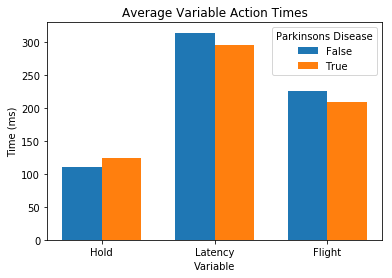

In [25]:
n_groups = 3

index = np.arange(n_groups)
fig, ax = plt.subplots()

bar_width = 0.35

rects1 = plt.bar(index, F_values, bar_width, label='False')

rects2 = plt.bar(index + bar_width, T_values, bar_width, label='True')

plt.xlabel('Variable')
plt.ylabel('Time (ms)')
plt.title('Average Variable Action Times')
plt.xticks(index + bar_width / 2, ('Hold', 'Latency', 'Flight'))
plt.legend(title = "Parkinsons Disease")
plt.show()

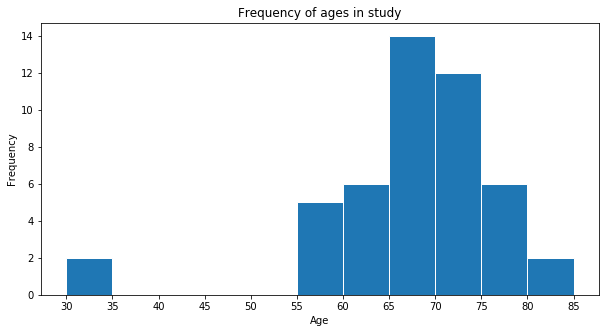

In [26]:
ages = data.loc[data["age"] != -1][["age", "Parkinsons"]]
fig, ax = plt.subplots(figsize = (10,5))
ticks = list(np.arange(ages["age"].min(),ages["age"].max(), 5))
plt.hist(ages["age"], bins = ticks, edgecolor = 'w', linewidth = 1, zorder = 3, stacked=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of ages in study')
plt.xticks(ticks)
plt.show()

Pairplots of features in the dataset


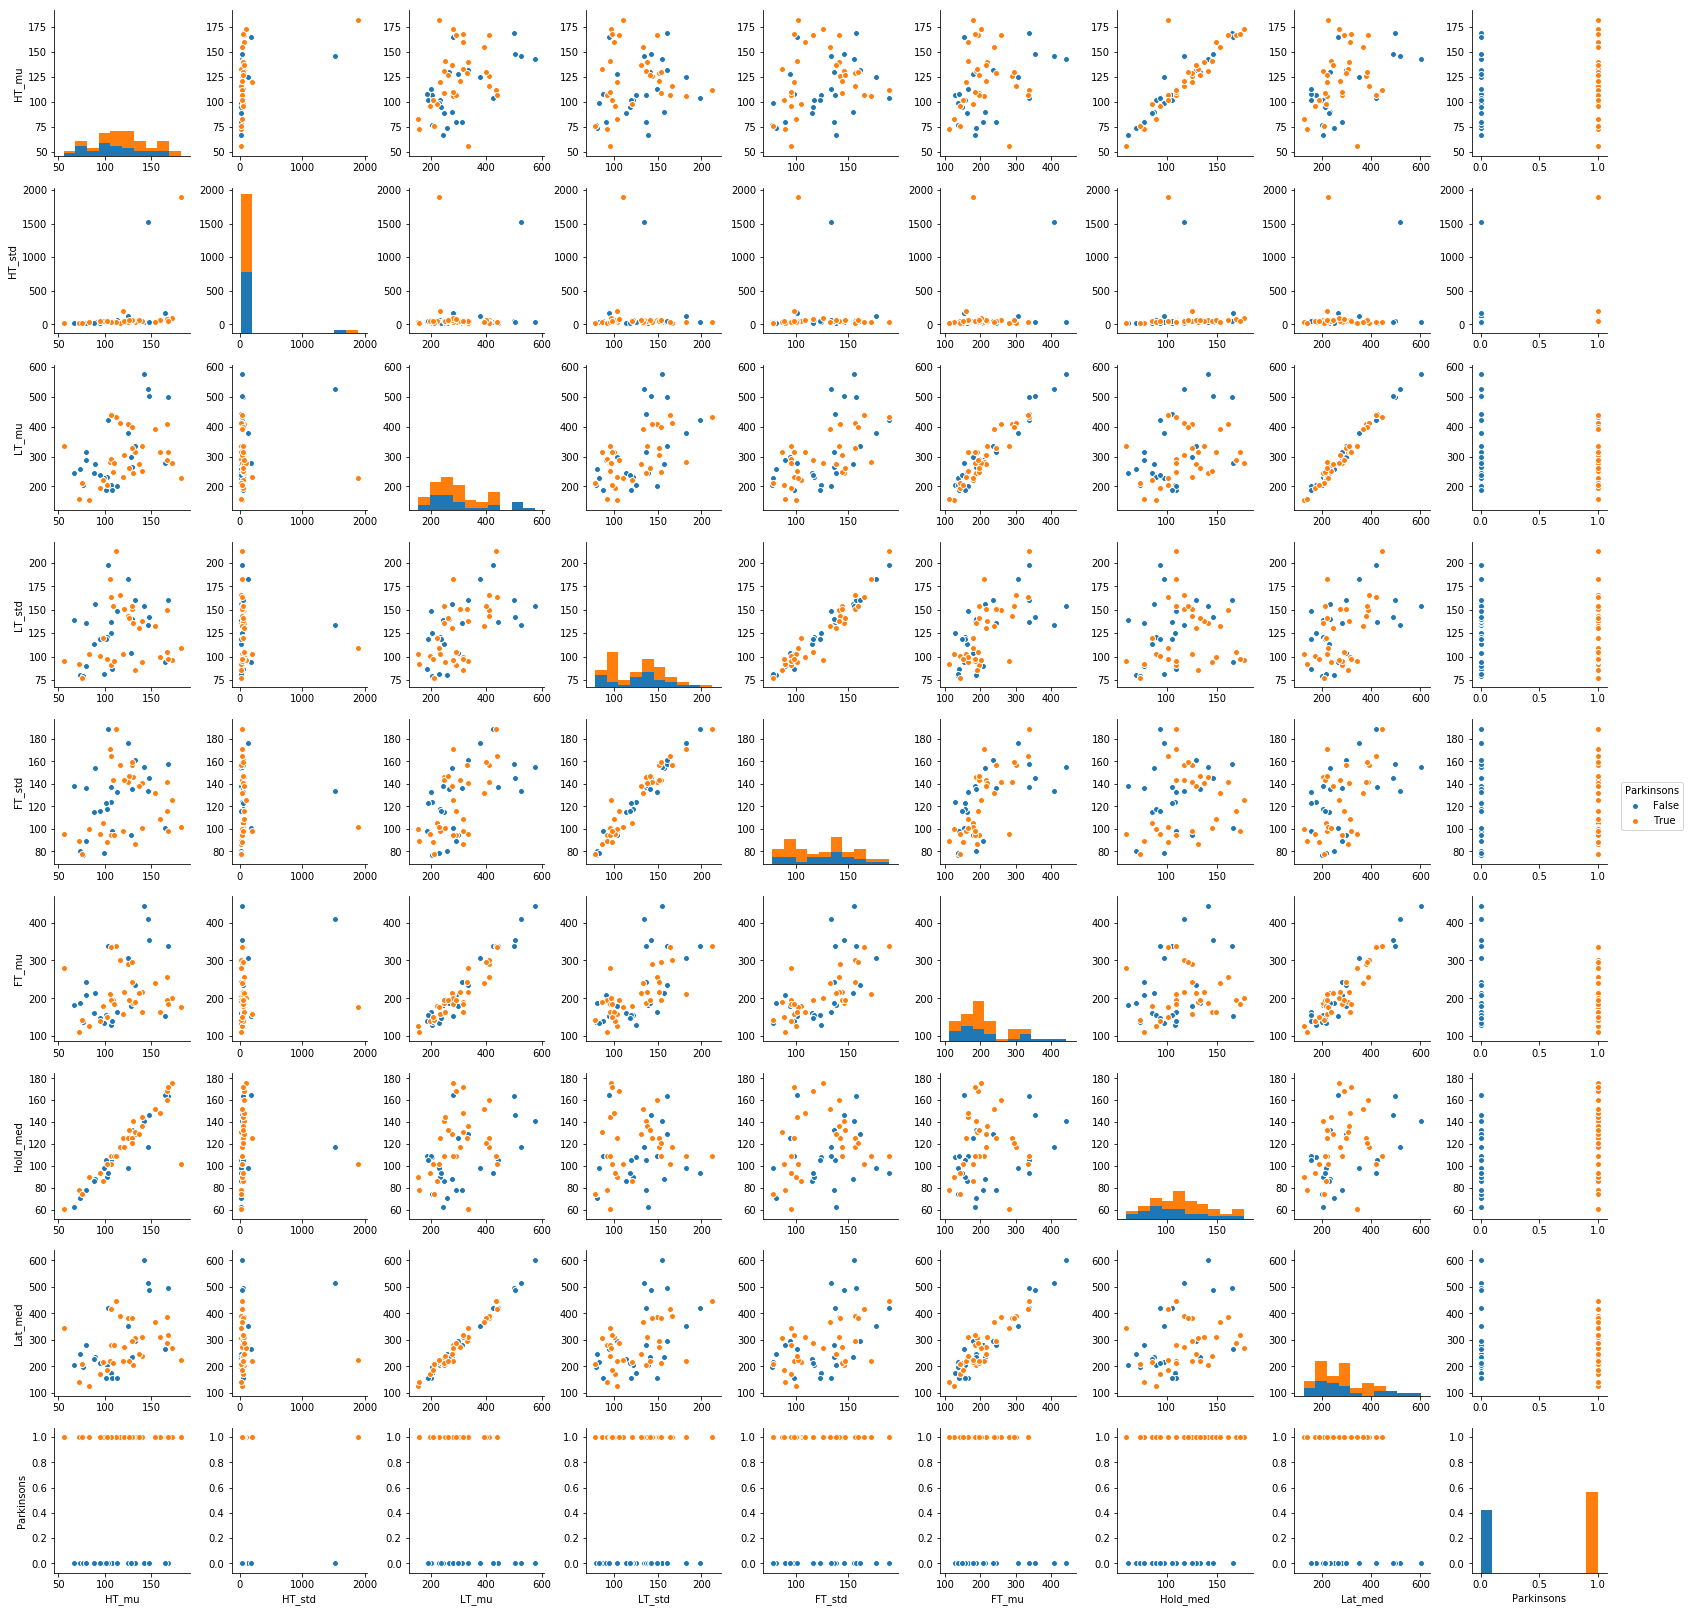

In [29]:
columns = ['HT_mu','HT_std', 'LT_mu', 'LT_std', 'FT_std', 'FT_mu',\
           'Hold_med', 'Lat_med', 'Parkinsons']
numeric_sub = data[columns]
pairs = sns.pairplot(numeric_sub, hue = 'Parkinsons')
print("Pairplots of features in the dataset")
plt.show()